# LINEAR ALGEBRA ANALYSIS OF OSCILLATIONS

In [1]:
import tellurium as te
import sympy
from sympy import init_printing
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import control

init_printing()

In [83]:
TIMES = [0.01*n for n in range(500)]

In [3]:
S1, S2, k1, k2, k3, k4, d, T, D, r1, r2, a, t, x1_0, x2_0 =   \
   sympy.symbols("S1, S2, k1, k2, k3, k4, d, T, D, r1, r2, a, t, x1_0, x2_0", real=True)
c1, c2 = sympy.symbols("c1, c2")

In [4]:
I = sympy.sqrt(-1)
sympy.simplify(I*I)

# Notation

**Scalars**

* $N$ is the number of chemical species (state variables)
* $n$ indexes chemical species
* $M$ is the number of reactions
* $m$ indexes reactions

**Vectors and Matrices**

* ${\bf x}$ ($N \times 1$) is the state vector
* ${\bf k}$ ($M \times 1$) is a vector of parameters
* ${\bf u}$ is the input vector
* ${\bf B}$ is the constant input matrix
* ${\bf A}$ is the constant state transition matrix
* ${\bf N}$ ($N \times M$) is the constant stoichiometry matrix
* ${\bf V}$ ($M \times N$) is the flux vector
* $\dot{ {\bf x}} = {\bf A} {\bf x} + {\bf B}{\bf u}$ is the time derivative of state


# Definitions

* A **reaction network** is a system of ODEs that can be realized by a collection of reactions where the concentration of chemical species are the state variables.

* A **linear reaction network (LRN)** is a reaction network with kinetics that form a system of linear ODEs.

* A **uni-reactant, mass action reaction network (UMRN)** is a reaction network in which all reactions have a single reactant and the kinetics are mass action.

* Two networks are **compatible** if they have the same chemical species. We can always make two networks compatible by including missing species, although there will be no reactions with those species.

# Preliminary Results

The goal of this analysis is to characterize how changes in reaction rates and/or structure affect eigenvalues, especially: (a) stability and (b) oscillations.

**Claim**: ${\bf A}$ specifies a UMRN system iff
there are ${\bf A} = {\bf N} {\bf V}$ such that:
* Every column in ${\bf N}$ has exactly one negative value.
* Every row in ${\bf V}$ has exactly one non-zero value.

**Observations for a UMRN**
* If ${\bf A}$ specifies a UMRA, then $r {\bf A}$ is a UMRA for $r \geq 0$.
* If ${\bf A}$, ${\bf A}^{\prime}$ are for compatible UMRN systems, then ${\bf A} + {\bf A}^{\prime}$ specifies a UMRA system.

**Possible Claim**: If ${\bf A}$ specifies a LRA, then exists UMRA matrices ${\bf N}$, ${\bf V}$ such that ${\bf A} = {\bf N} {\bf V}$.

**Claim**: A UMRA is an LRA.

**Proof**: 

**Claim**: Consider an UMRA with state variable Jacobian ${\bf A}$
and eigenvalues $\lambda_1, \cdots, \lambda_N$.
Consider a second UMRA that consists entirely of autocatyltic reactions
so that $\dot{x} = a x$, $a > 0$ for all state variables $x$.
Then, the combination of these two networks has the eigenvalues
$\lambda_1 + a, \cdots, \lambda_N +a$.

This claim allows us to change the real part of the eigenvalues.

# Analysis of Characteristic Equations

For the Jacobian ${\bf A}$, the characteristic equation is
$p(\lambda) = |{\bf A} - \lambda {\bf I}| = 0$.

$p(\lambda)$ can be expressed in the following ways.
1. $p(\lambda) = \sum_{n=0}^N \alpha_n \lambda^n$
1. $p(\lambda) = \Pi_{n=1}^N (\lambda - \lambda_n)$
1. $p(\lambda) = \sum_{\sigma} sign(\sigma) \Pi_{n=1}^N (a_{n, \sigma(n)} - \phi_{n, \sigma(n)} \lambda)$, where $\phi_{n_1, n_2} = 1 \iff n_1 = n_2$.

In the foregoing, $\sigma$ is a permutation of $(1, \cdots, N)$,
and $sign(\sigma)$ is $(-1)^n$, where $n$ is the number of pairwise exchanges to construct the permutation from the identity permutation.

Suppose that initially ${\bf A}$ is diagonal with $a_{nn} < 0$.
That is, the network consists entirely of degradation reactions,
and let $p$ be the characteristic polynomial for this network.
Now consider ${\bf A}^{\prime}$ that adds to this network
the reactions
$x_1 \rightarrow m_2 x_2$ at rate $k_1$, where $m_2$ is the stoichiometry of the species $x_2$,
and $x_2 \rightarrow m_1 x_1$ at rate $k_2$.
Let $p^{\prime}$ be the characteristic polynomial for this network.
${\bf A}^D = {\bf A}^{\prime} - {\bf A}$ has 3 non-zero entries:
* $a^D_{1,1} = -k_1$
* $a^D_{1,2} = m_2 k_1$
* $a^D_{2, 1} = m_1 k_2$
* $a^D_{2,2} = -k_2$

Further, define $p_{1,2} (\lambda) = \Pi_{n\neq1,2} (\lambda - \lambda_n)$.
$p(\lambda) = p_{1,2}(\lambda) (\lambda - \lambda_1)(\lambda - \lambda_2) $.
$p^{\prime} (\lambda) = p_{1,2}(\lambda)
\left( (\lambda - \lambda_1)(\lambda - \lambda_2) - a^D_{1,2} a^D_{2,1} \right)$.

[Is this correct? I should get an imaginary result?]

A key consideration is determining if a cubic equation has a pure imaginary root.

Consider 
\begin{eqnarray}
p(\lambda) & = & (\lambda - r)(\lambda - ib)(\lambda + ib) \\
& = & (\lambda -r)(\lambda^2 + b^2) \\
& = & \lambda^3 - r \lambda^2 + b^2 \lambda - r b^2 \\
& = & A \lambda^3 - B \lambda^2 + C \lambda - D \\
\end{eqnarray}
where $A = 1$.

Observed that the roots are easily determined from the coefficients of the terms.
A simple check is that $D = BC$, and $B, C, D$ are functions of ${\bf k}$.

Consider the objective function $min_{\bf k} |D - BC|$. The one concern here is that all eigenvalues are non-positive.


Construct a explicit expression for the cubic equation for a 3 state system.

# Simulation

Traceback (most recent call last):
  File "/tmp/ipykernel_947529/66161621.py", line 33, in <cell line: 33>
RuntimeError: Object of type <class 'NamedArray'> appears to be C subclassed NumPy array, void scalar, or allocated in a non-standard way.NumPy reserves the right to change the size of these structures. Projects are required to take this into account by either recompiling against a specific NumPy version or padding the struct and enforcing a maximum NumPy version.
Exception ignored in: 'PyDataMem_UserFREE'
Traceback (most recent call last):
  File "/tmp/ipykernel_947529/66161621.py", line 33, in <cell line: 33>
ValueError: PyCapsule_GetPointer called with invalid PyCapsule object


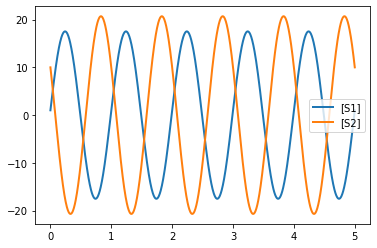

Traceback (most recent call last):
  File "/tmp/ipykernel_947529/66161621.py", line 34, in <cell line: 34>
RuntimeError: Object of type <class 'NamedArray'> appears to be C subclassed NumPy array, void scalar, or allocated in a non-standard way.NumPy reserves the right to change the size of these structures. Projects are required to take this into account by either recompiling against a specific NumPy version or padding the struct and enforcing a maximum NumPy version.


In [67]:
model = """
S1 -> 2 S1; k1*S1
S1 -> S2; k2*S1
S2 -> ; k3*S1
S2 -> S1; k4*S2
//S1 -> ; 50
//-> S2; 20

k2 = 1
k4 = -1     # assigned externally
delta = -1  # assigned externally
k1 = k2 + k4
k3 = k1 + delta

S1 = 1
S2 = 10

"""
# a: alpha, d: delta
period = 1
frequency_in_time = 1/period
frequency_in_radians = frequency_in_time*2*np.pi
PARAM_DCT = {"k2": 1.0, "k4": 10.0, "a": frequency_in_radians}
PARAM_DCT["k1"] = PARAM_DCT["k2"] + PARAM_DCT["k4"]
PARAM_DCT["d"] = (frequency_in_radians**2)/PARAM_DCT["k4"]
PARAM_DCT["k3"] = PARAM_DCT["k1"] + PARAM_DCT["d"]
rr = te.loada(model)
PARAM_DCT["x1_0"] = rr["S1"]
PARAM_DCT["x2_0"] = rr["S2"]
for k, v in PARAM_DCT.items():
    if k in rr.keys():
        rr[k] = v
rr.simulate(0, 5, 1000)
rr.plot()

In [68]:
PARAM_DCT

{'k2': 1.0,
 'k4': 10.0,
 'a': 6.283185307179586,
 'k1': 11.0,
 'd': 3.947841760435743,
 'k3': 14.947841760435743,
 'x1_0': 1.0,
 'x2_0': 10.0}

In [69]:
np.sqrt(PARAM_DCT["k4"]*PARAM_DCT["d"]), PARAM_DCT["a"]

# Helpers

In [7]:
def pp(arr):
    print(pd.DataFrame(arr))

In [8]:
def makeTimes(start_time=0, end_time=5, point_density=10):
    return [1/point_density*n for n in range(start_time, point_density*end_time+1)]
# TESTS
end_time = 10
point_density = 2
times = makeTimes(end_time=end_time, point_density=point_density)
assert(len(times) == point_density*end_time+1)

In [9]:
# Simulation of the model
def simulateLinearSystem(A=None, B=None, is_plot=True):
    """
    Simulates the linear system specified by A and B
    """
    if A is None:
        A = np.array([ [PARAM_DCT["k1"] - PARAM_DCT["k2"], PARAM_DCT["k4"]],
                           [PARAM_DCT["k2"] - PARAM_DCT["k3"], - PARAM_DCT["k4"] ] ])
    if B is None:
        B = np.eye(2)
    C = np.eye(2)
    D = 0*np.eye(2)
    sys = control.StateSpace(A, B, C, D)
    sys = control.LinearIOSystem(sys, inputs=["S1", "S2"], outputs=["S1", "S2"])
    X0 = [1, 10]
    times = makeTimes(end_time=20)
    response = control.input_output_response(sys, T=times, X0=X0)
    plt.plot(response.t, response.y[0])
    plt.plot(response.t, response.y[1])
    plt.legend(["S1", "S2"], loc="upper left")
    if not is_plot:
        plt.close()
    
# Tests
simulateLinearSystem(is_plot=False)

# Two Species System

Consider an URMA network consisting of $S_1$, $S_2$.

Let ${\bf A} =
\begin{pmatrix}
a_{11} & a_{12} \\
a_{21} & a_{22} \\
\end{pmatrix}
$
Denote the determinant by $D = a_{11} a_{22} - a_{12} a_{21}$
and the trace by $T = a_{11} + a_{22}$. The eigenvalues are
$\lambda = \frac{1}{2} \left( - T \pm \sqrt{T^2 - 4 D} \right)$.
So, to get pure imaginary eigenvalues, $T = 0$
and $D > 0$.

$T = 0$ implies that either the diagonal is zero or
one diagonal term is positive and the other is negative.
In either case, it must be that one of the off-diagonal terms is negative.

We can obtain a positive value for a diagonal term by having self-catlytic reactions, such as $S_1 \rightarrow S_1 + S_1$
with mass action kinetics $k S_1$.
We can obtain a negative value for an off-diagonal term by having
degrading reactions catlyzed by the other element, such as
$S_2 \rightarrow ∅$ with kinetics $k S_1 S_2$. Note that these are non-linear kinetics that might be approximated by linear kinetics. 

**Issue**
1. Why is period 10 instead of 5?

## System Equations

This system equations are:
$
\begin{eqnarray}
\dot{S}_1 & = & k_1 S_1 + k_4 S_2 - k_2 S_1 \\
\dot{S}_2 & = & - k_3 S_1 + k_2 S_1 - k_4 S_2 \\
\end{eqnarray}
$

Let ${\bf x} = 
\begin{pmatrix}
S_1 \\
S_2 \\
\end{pmatrix}
$, and
$
{\bf A} = 
\begin{pmatrix}
k_1 - k_2 & k_4 \\
k_2 - k_3 & -k_4 \\
\end{pmatrix}
$.

The full model is:
$\dot{\bf x} = {\bf A} {\bf x} + {\bf u}$.

Note that
\begin{eqnarray}
T & = & tr(A) = k_1 -k_2 - k_4 \\
D & = & det(A) = (k_1 - k_2)(-k_4) - k_4 (k_2 - k_3) \\
& = & k_4 (k_3 - k_1) \\
\end{eqnarray}

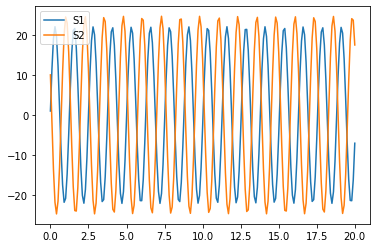

In [10]:
# Valiation plot that should be identical with simulation
simulateLinearSystem()

## Jacobian for Pure Imaginary Eigenvalues

The eigenvalues a $2 \times 2$ matrix are

$\lambda = - \frac{T \pm \sqrt{T^2 - 4 D}}{2}$.

The pole $\lambda$ is pure imaginary (i.e., $\sqrt{D}i$) if:
1. $T = 0$. That is, $k_1 = k_2 + k_4$.
1. $D > 0$. That is, $k_3 > k_1$.

$D > 0 \iff k_4(k_3 - k_1) > 0$.
Clearly $k_4 > 0$ since $D>0$, and so we can divide by $k_4$.
So, we have the criteria is $k_3 = k_1 + \delta$ for $\delta >0$.


Note that if $tr({\bf A}) = 0$ and $D >0$:
1. $k_1 = k_2 + k_4$.
1. $k_3 = \delta + k_2 + k_4$, $\delta > 0$.

$
{\bf A} =
\begin{pmatrix}
k_1 - k_2 & k_4 \\
k_2 - k_3 & -k_4 \\
\end{pmatrix}
$.

Substituting,
${\bf A} =
\begin{pmatrix}
k_2 + k_4 - k_2 & k_4 \\
k_2 - \delta - k_2 - k_4 & -k_4 \\
\end{pmatrix}
=
\begin{pmatrix}
k_4 & k_4 \\
-\delta -k_4 & -k_4 \\
\end{pmatrix}
$.

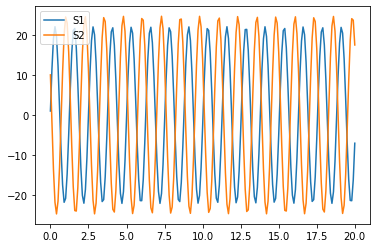

In [11]:
# Validation plot
A = np.array([ [PARAM_DCT["k4"], PARAM_DCT["k4"]],
                           [-PARAM_DCT["d"] - PARAM_DCT["k4"], - PARAM_DCT["k4"] ] ])
simulateLinearSystem(A=A)

In [12]:
# Period requires converting from radians
1/(np.sqrt(PARAM_DCT["d"]*PARAM_DCT["k4"])/(2*np.pi))

## Eigenvectors for Pure Imaginary Eigenvalues

In [13]:

A = sympy.Matrix([ [k4 , k4], [-d-k4, -k4]])
A

⎡  k₄     k₄ ⎤
⎢            ⎥
⎣-d - k₄  -k₄⎦

In [14]:
A.eigenvects()

⎡⎛               ⎡⎡             _______⎤⎤⎞  ⎛              ⎡⎡             _______⎤⎤⎞⎤
⎢⎜               ⎢⎢    k₄     ╲╱ -d⋅k₄ ⎥⎥⎟  ⎜              ⎢⎢    k₄     ╲╱ -d⋅k₄ ⎥⎥⎟⎥
⎢⎜   _______     ⎢⎢- ────── + ─────────⎥⎥⎟  ⎜  _______     ⎢⎢- ────── - ─────────⎥⎥⎟⎥
⎢⎜-╲╱ -d⋅k₄ , 1, ⎢⎢  d + k₄     d + k₄ ⎥⎥⎟, ⎜╲╱ -d⋅k₄ , 1, ⎢⎢  d + k₄     d + k₄ ⎥⎥⎟⎥
⎢⎜               ⎢⎢                    ⎥⎥⎟  ⎜              ⎢⎢                    ⎥⎥⎟⎥
⎣⎝               ⎣⎣         1          ⎦⎦⎠  ⎝              ⎣⎣         1          ⎦⎦⎠⎦

### Validate the eigenvectors

In [15]:
vec = A.eigenvects()[0][2][0]
vec

⎡             _______⎤
⎢    k₄     ╲╱ -d⋅k₄ ⎥
⎢- ────── + ─────────⎥
⎢  d + k₄     d + k₄ ⎥
⎢                    ⎥
⎣         1          ⎦

In [16]:
# First eigenvalue, eigenvector
vec = A.eigenvects()[0][2][0]
sympy.simplify((-sympy.eye(2)*sympy.sqrt(-d *k4) - A)*vec)

⎡0⎤
⎢ ⎥
⎣0⎦

In [17]:
# Second eigenvalue, eigenvector
vec = A.eigenvects()[1][2][0]
sympy.simplify((sympy.eye(2)*sympy.sqrt(-d *k4) - A)*vec)

⎡0⎤
⎢ ⎥
⎣0⎦

### Format eigenvectors

In [18]:
sympy.pretty_print(A.eigenvects()[0][2][0])
sympy.pretty_print(A.eigenvects()[1][2][0])

⎡             _______⎤
⎢    k₄     ╲╱ -d⋅k₄ ⎥
⎢- ────── + ─────────⎥
⎢  d + k₄     d + k₄ ⎥
⎢                    ⎥
⎣         1          ⎦
⎡             _______⎤
⎢    k₄     ╲╱ -d⋅k₄ ⎥
⎢- ────── - ─────────⎥
⎢  d + k₄     d + k₄ ⎥
⎢                    ⎥
⎣         1          ⎦


The eigenvalues are:

$
\begin{eqnarray}
\lambda_1 &=& - \sqrt{\delta k_4} i \\
\lambda_2 &=&  + \sqrt{\delta k_4} i
\end{eqnarray}
$

We define $\alpha = \sqrt{\delta k_4}$, and so
$\lambda_n = (-1)^n \alpha i$.

The eigenvectors are:

$
\begin{eqnarray}
{\bf e}_1 & = &
\left[\begin{matrix}- \frac{k_{4}}{\delta + k_{4}} - \frac{\alpha i}{\delta + k_{4}}\\1\end{matrix}\right] \\
{\bf e}_2 & = &
\left[\begin{matrix} - \frac{k_{4}}{\delta + k_{4}} + \frac{\alpha i}{d + k_{4}}\\1\end{matrix}\right] \\
\end{eqnarray}
$

## Solution to Homogeneous IVP

Note that if the eigenvalue ${\bf e}$ and/or
vector $\lambda$ are complex, then
${\bf e} e^{\lambda} = {\bf v}_1 + i {\bf v}_2$ for
some real vectors ${\bf v}_n$.
By theorem, the ${\bf v}_n$ are independent solutions to
the differential equation
and so the solution to the IVP
is $\sum_{n=1}^2 c_n v_n$ for $c_n$ chosen
based on the initial values.

Let $r_1 = \frac{k_4}{k_4 + \delta}$
and $r_2 = \frac{\alpha}{\delta + k_4}$,
where $\alpha = \sqrt{\delta k_4}$.

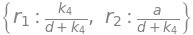

In [70]:
DCT = {r1: k4/(d + k4), r2: a/(d + k4)}
DCT

In [71]:
# Using the second eigenvector
e_vec = sympy.Matrix([ [-r1 - r2*I], [1]])*(sympy.exp(I*a*t))
e_vec

⎡              ⅈ⋅a⋅t⎤
⎢(-r₁ - ⅈ⋅r₂)⋅ℯ     ⎥
⎢                   ⎥
⎢       ⅈ⋅a⋅t       ⎥
⎣      ℯ            ⎦

In [72]:
vecs = e_vec.as_real_imag()
vecs

⎛⎡-r₁⋅cos(a⋅t) + r₂⋅sin(a⋅t)⎤  ⎡-r₁⋅sin(a⋅t) - r₂⋅cos(a⋅t)⎤⎞
⎜⎢                          ⎥, ⎢                          ⎥⎟
⎝⎣         cos(a⋅t)         ⎦  ⎣         sin(a⋅t)         ⎦⎠

The solution to the homogenous equation has the form:

In [73]:
c1*vecs[0] + c2*vecs[1]

⎡c₁⋅(-r₁⋅cos(a⋅t) + r₂⋅sin(a⋅t)) + c₂⋅(-r₁⋅sin(a⋅t) - r₂⋅cos(a⋅t))⎤
⎢                                                                 ⎥
⎣                    c₁⋅cos(a⋅t) + c₂⋅sin(a⋅t)                    ⎦

In [74]:
x = sympy.Matrix([ [x1_0], [x2_0]])
x

⎡x₁ ₀⎤
⎢    ⎥
⎣x₂ ₀⎦

In [75]:
# Solve for c1, c2
expr = x - c1*vecs[0] - c2*vecs[1]
expr.subs(t, 0)

⎡c₁⋅r₁ + c₂⋅r₂ + x₁ ₀⎤
⎢                    ⎥
⎣     -c₁ + x₂ ₀     ⎦

In [76]:
constant_dct = sympy.simplify(sympy.solve(expr.subs(t, 0), [c1, c2]))
constants = list(constant_dct.values())
constant_dct

In [77]:
for k, v in PARAM_DCT.items():
    DCT[eval(k)] = v
DCT = {k: v.subs(DCT) if not isinstance(v, float) else v for k, v in DCT.items()}
DCT

In [78]:
constant_dct[c1].subs(DCT), constant_dct[c2].subs(DCT)

In [79]:
ivp_solution = constants[0]*vecs[0] + constants[1]*vecs[1]
ivp_solution.subs(DCT).subs(DCT)

⎡17.5070437401085⋅sin(6.28318530717959⋅t) + 0.999999999999999⋅cos(6.28318530717959⋅t)⎤
⎢                                                                                    ⎥
⎣      -18.1353622708264⋅sin(6.28318530717959⋅t) + 10.0⋅cos(6.28318530717959⋅t)      ⎦

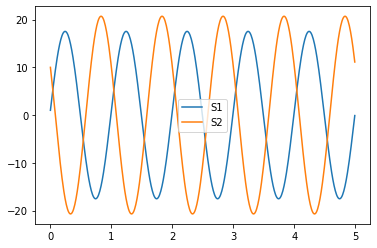

In [88]:
# Simulation of ivp_solution
s1_vals = [sympy.N(ivp_solution.subs(DCT).subs(t, v))[0] for v in TIMES]
s2_vals = [sympy.N(ivp_solution.subs(DCT).subs(t, v))[1] for v in TIMES]
plt.plot(TIMES, s1_vals)
plt.plot(TIMES, s2_vals)
plt.legend(["S1", "S2"])

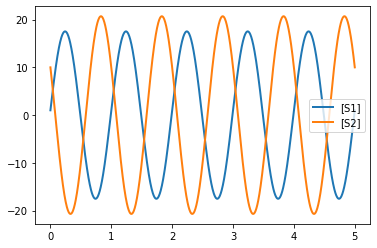

Traceback (most recent call last):
  File "/tmp/ipykernel_947529/698005043.py", line 1, in <cell line: 1>
RuntimeError: Object of type <class 'NamedArray'> appears to be C subclassed NumPy array, void scalar, or allocated in a non-standard way.NumPy reserves the right to change the size of these structures. Projects are required to take this into account by either recompiling against a specific NumPy version or padding the struct and enforcing a maximum NumPy version.


In [86]:
rr.plot()

**To Do**
1. Cross check with simulation

## Solution With Forced Inputs

## Validations With Simulations

Note that the eigenvalues a $2 \times 2$ matrix are

$\lambda = - \frac{T \pm \sqrt{T^2 - 4 D}}{2}$.

The pole $\lambda$ is pure imaginary (i.e., $\sqrt{D}i$) if:
1. $T = 0$. That is, $k_1 = k_2 + k_4$.
1. $D > 0$. That is, $k_3 > k_1$.

$D > 0 \iff (k_1 - k_2)(-k_4) - k_4 (k_2 - k_3) > 0$.
Clearly $k_4 > 0$ if $D>0$, and so we can divide by $k_4$.
So, we have the criteria is $k_3 = k_1 + \delta$ for $\delta >0$.

${\bf A} = 
\begin{pmatrix}
k_4 & k_4 \\
-\delta -k_4 & -k_4 \\
\end{pmatrix}
$.

Let ${\bf e}$ be an eigenvector for ${\bf A}$.
That is, $\left( {\bf A} - {\bf I} \sqrt{D}i   \right) {\bf e} = 0$.
So, 
\begin{eqnarray}
(k_4 - \sqrt{D}i) e_1 & + & k_4 e_2 & = & 0 \\
-(\delta + k_4) e_1 & - & (k_4 + \sqrt{D}i) e_2 & = & 0 \\
\end{eqnarray}
and so
\begin{eqnarray}
\frac{k^2_4 + D}{k_4} e_1 + (k_4 + \sqrt{D}i) e_2 & = & 0 \\
-(\delta + k_4) e_1 -(k_4 + D) e_2 & = & 0 \\
\end{eqnarray}
Substituting and simplifying
\begin{eqnarray}
(k_4 + \delta) e_1 + (k_4 + \sqrt{D}i) e_2 & = & 0 \\
-(\delta + k_4) e_1 -(k_4 + \sqrt{D}i) e_2 & = & 0 \\
\end{eqnarray}
and adding
\begin{eqnarray}
k_4 (1 - \delta) e_1 + (k_4 + D) e_2 & = & 0 \\
e_1  & = & 2 \delta - 1 \\
\end{eqnarray}

## Designing the Oscillator

Considerations in the design
1. Frequency of oscillation. By design, this is $\sqrt{D}$.
1. Amplitude of oscillation
1. Center point of oscillation

### Amplitude of oscillation

Let ${\bf x}$ be the state vector.
Then the Laplace transform for the initial conditions ${\bf x}(0)$
is 
$s {\bf x} (s) = {\bf A} {\bf x} + {\bf x} (0)$ or
${\bf x} (s) = \left( s {\bf I} - {\bf A} \right)^{-1} {\bf x}(0)$.

$
\begin{eqnarray}
det \left( s {\bf I} - {\bf A} \right) & = &
(s + k_4)(s-k_1 +k_2) - k_4(k_2 - k_3) \\
& = & s^2 + (k_4 -k_1 + k_2)s + D \\
& = & s^2 + D\\
\end{eqnarray}
$ by design.

$
\left( s {\bf I} - {\bf A} \right)^{-1}
=
\frac{1}{s^2 + D}
\begin{pmatrix}
s + k_4  & -k_4 \\
k_4 + \delta & s - k_4 \\
\end{pmatrix}$.

### Center point of oscillation

This will depend on ${\bf u}$.
Solve the differential equation in the time domain.

**Notes**
1. Can translate the position of the cycles using external inputs. Explain why.
1. Calculating $| {\bf x}(0) |$ as $s \rightarrow \sqrt{D}$ indicates that we can control amplitude by: (a) having different initial values for the state variables and (b) adjusting $k_4$. But the latter must be done in concert with changes to $k_3 - k_1$ so as not to change frequency.

# Notes
1. Develop the idea of a UMRA approximation to a non-linear network.
  1. For mas action networks with two reactants, create two separate uni-reactant reactions. How select the kinetics constants in the approximation to most accurate estimate the original network. The kinetics constants can be approximated using a Taylor's series or by an orthogonal projection for an appropriately defined inner product space.

1. Note that the eigenvalues are ${\bf e} = \{ \lambda |  det \left( {\bf A} - \lambda {\bf I} \right) = 0 \}$.
Since ${\bf A} = {\bf H} + {\bf K}$,
$ {\bf A} - \lambda {\bf I}  = {\bf H} + {\bf K} - \lambda {\bf I}$.

1. Note that $det \left( {\bf A} - \lambda {\bf I} \right)
= \left( {\bf N V} - \lambda {\bf I} \right)$.
Further, $det \left( {\bf N} - \lambda {\bf I} \right) \left(
 {\bf V} - \lambda {\bf I} \right)$
 $= det \left[ {\bf N}{\bf V} - \lambda {\bf N} - \lambda {\bf V} + I \right]$. Can I use information about the [sum of determinants](https://www.geeksforgeeks.org/eigen-values-and-eigen-vectors/) to figure out
 how $\lambda$ changes if $k_m$ changes?

1. From ["Facts about Eigenvalues"](https://www.adelaide.edu.au/mathslearning/ua/media/120/evalue-magic-tricks-handout.pdf), I know that for a polynomial function $g(x)$, $g({\bf A})$ has eigenvalues $g(\lambda_1), \cdots, g(\lambda_n)$ for the matrix ${\bf A}$ with eigenvalues $\lambda_1, \cdots, \lambda_n$.
So, it's easy to transform ${\bf A}$ in a way that preserves
UMRN so that the dominant eigenvalue is at 0 by subtracting along
the diagonal.
The challenge is making the this eigenvalue have a non-zero imaginary component.

1. Note that in the decomposition into Hermitian and skew Hermitian matrices ${\bf A} = {\bf H} + {\bf K}$, the diagonal of ${\bf K}$ must be zero if ${\bf A}$ is real valued.
So, how can ${\bf K}$ be transformed to create imaginary eigenvalues?

1. Might consider using the polar decomposition, where ${\bf A} = {\bf U} {\bf P}$, where ${\bf U}$ is unitary and ${\bf P}$ is positiv semidefinite. My hypothesis is that if ${\bf U}$ is a rotation other than $n \pi$, then ${\bf A}$ has at least one imaginary eigenvalue. I still have the challenge of making the *dominant* eigenvalue have a non-zero imaginary part.

1. Try exploring matrices and their decompositions to understand the criteria for obtaining eigenvalues with a non-zero imaginary part.

1. **Issue**: Not getting the correct period


# Other Oscilators

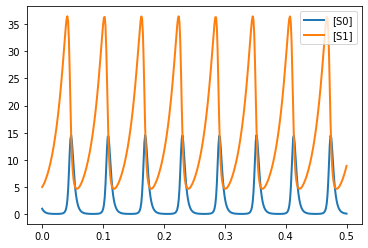

Traceback (most recent call last):
  File "/tmp/ipykernel_947529/1829626470.py", line 17, in <cell line: 17>
RuntimeError: Object of type <class 'NamedArray'> appears to be C subclassed NumPy array, void scalar, or allocated in a non-standard way.NumPy reserves the right to change the size of these structures. Projects are required to take this into account by either recompiling against a specific NumPy version or padding the struct and enforcing a maximum NumPy version.


In [29]:
# Evolved oscillator
r = te.loada ('''
var S0
var S1
ext S2
S1 -> S1+S1; k0*S1
S1 + S0 -> S0 + S0; k1*S1*S0
S0 -> ; k2*S0
k0 = 54
k1 = 22
k2 = 340
S0 = 1.0
S1 = 5.0
S2 = 9.0
''')
m = r.simulate (0, 0.5, 400)
r.plot()

Traceback (most recent call last):
  File "/tmp/ipykernel_947529/4172634683.py", line 25, in <cell line: 25>
RuntimeError: Object of type <class 'NamedArray'> appears to be C subclassed NumPy array, void scalar, or allocated in a non-standard way.NumPy reserves the right to change the size of these structures. Projects are required to take this into account by either recompiling against a specific NumPy version or padding the struct and enforcing a maximum NumPy version.
Exception ignored in: 'PyDataMem_UserFREE'
Traceback (most recent call last):
  File "/tmp/ipykernel_947529/4172634683.py", line 25, in <cell line: 25>
ValueError: PyCapsule_GetPointer called with invalid PyCapsule object


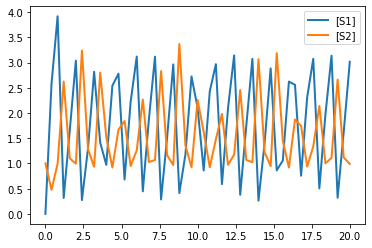

Traceback (most recent call last):
  File "/tmp/ipykernel_947529/4172634683.py", line 26, in <cell line: 26>
RuntimeError: Object of type <class 'NamedArray'> appears to be C subclassed NumPy array, void scalar, or allocated in a non-standard way.NumPy reserves the right to change the size of these structures. Projects are required to take this into account by either recompiling against a specific NumPy version or padding the struct and enforcing a maximum NumPy version.


In [30]:
model = """
// Oscillator (Heinrich model)
// From the review:
// Metabolic Regulation and Mathematical Models
// R.HEINRICH, S.M.RAPOPORT, T.A.RAPOPORT
// In Progress in Biophysics and Molecular Biology
// 1977, Vol 32, p1-82

// Reactions:
J0: $X0 -> S1; v0
J1: S1 -> ; k3*S1
J2: S1 -> S2; (k1*S1 - k_1*S2)*(1 + c*S2^q)
J3: S2 ->; k2*S2

// Species initializations
S1 = 0; S2 = 1; X0 = 1

// Variable initializations
v0 = 8; k3 = 0
k1 = 1; k_1 = 0
c = 1;  q = 3
k2 = 5;
"""
rr = te.loada(model)
rr.simulate(0, 20)
rr.plot()

# Save

The homogeneous system is $\dot{\bf x} = {\bf A} {\bf x}$.
Consider
Its solution has the for
${\bf x}(t) = \sum _{n=1}^2 c_n {\bf e}_n e^{\lambda_n t}$.

The homogeneous system is $\dot{\bf x} = {\bf A} {\bf x}$.
Its solution has the for
${\bf x}(t) = \sum _{n=1}^2 c_n {\bf e}_n e^{\lambda_n t}$.

Note that $e^{\pm \alpha i } = cos(\alpha ) \pm i sin(\alpha )$.
In the following, $\alpha = \sqrt{\delta k_4}$.
So

$
\begin{eqnarray}
{\bf x} (t) & = & c_1 {\bf e}_1 e^{\lambda_1 t} + c_2 {\bf e}_2 e^{\lambda_2 t} \\
& = & c_1 {\bf e}_1 \left[ cos (\alpha t) - i sin(\alpha t) \right] 
+ c_2 {\bf e}_2 [ cos (\alpha t) + i sin(\alpha t) ]  \\
& = &
c_1 \left[\begin{matrix} - \frac{k_{4}}{\delta - k_{4}} [cos(\alpha) - i sin(\alpha)]  -
\frac{\alpha i}{d + k_{4}}[cos(\alpha) - i sin(\alpha)]\\
cos(\alpha) - i sin(\alpha)
\end{matrix}\right] +
c_2 \left[\begin{matrix} - \frac{k_{4}}{\delta + k_{4}} [cos(\alpha) + i sin(\alpha)]  + \frac{\alpha i}{d + k_{4}}[cos(\alpha) + i sin(\alpha)]\\
cos(\alpha) + i sin(\alpha)
\end{matrix}\right] \\
& = &
2c \left[ \begin{matrix} -\frac{k_4}{\delta + k_4}cos(\alpha t) -\frac{\alpha}{\delta + k_4}sin(\alpha t) \\
  cos(\alpha t)
\end{matrix} \right]
\end{eqnarray}
$.

There is no solution that is consistent with the assumption that the
eigenvalues are pure imaginary.
Note that in order to get real values for the solution, we must have $c_1 = c = c_2$.
So, $c = \frac{x_2(0)}{2}$.
But $c = -\frac{x_1(0) [k_4 + \delta]}{2 k_4}$.

Make this into a sum of real and imaginary values.
$
\begin{eqnarray}
& = &
 \left[\begin{matrix} - \frac{k_{4}}{\delta - k_{4}} [c_1 + c_2] cos(\alpha) +
\frac{\alpha i}{d + k_{4}}[c_2 - c_1]\\
c_1 + c_2
\end{matrix}\right]  \\
& ~~ + &
 \left[\begin{matrix} - \frac{k_{4}}{\delta - k_{4}} [- c_1 + c_2]  +
\frac{\alpha i}{d + k_{4}}[c_2 + c_1]\\
- c_1 + c_2
\end{matrix}\right] i sin(\alpha) 
\end{eqnarray}
$.
